In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
folder_path = './results'

In [3]:
dataframes = {}

for filename in os.listdir(folder_path):
    if filename.endswith('csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes[filename] = df
        print(f'Loaded: {filename}')

Loaded: 2025-11-26.csv
Loaded: 2025-11-21.csv
Loaded: 2025-11-23.csv
Loaded: 2025-11-27.csv
Loaded: 2025-11-20.csv
Loaded: 2025-11-25.csv
Loaded: 2025-11-22.csv
Loaded: 2025-11-24.csv


In [4]:
for key ,val in zip(dataframes.keys(), dataframes.values()):
    val = val.reset_index().rename(columns={'index':'rank'})
    dataframes[key] = val

In [5]:
df_total = pd.concat(dataframes.values(), ignore_index=False)  

In [6]:
df_total.head()

,rank,evaluation_date,uid,miner_hotkey,score,average_score,tested_entries,run_time_s,fbeta,weighted_f1,precision,recall,accuracy,model_url,errors
0,0,2025-11-26 15:46,122,5DRziDa6PGPMw5FkVh77WfevQdgzbbQ3NREpmNPVeQoETqaU,0.656272,0.670087,50.0,2.815585,0.837395,0.396160,0.843889,0.84,0.84,https://huggingface.co/speechmaster/76_123/blo...,NaN
1,1,2025-11-26 15:46,18,5CAZfA1Pz31zLAGngEHqz8rCcBiBUr8g6tmcT1SBa1pjNYxo,0.664216,0.665159,50.0,2.991870,0.844612,0.413813,0.891619,0.84,0.84,https://huggingface.co/speechmaster/76_118/blo...,NaN
2,2,2025-11-26 15:46,62,5GCH3w8m2H9ZC2fVAAPcEJQFz9xSzMJ1FCqXfYCLB6go6tD6,0.622000,0.653094,50.0,2.945914,0.818933,0.340000,0.822793,0.82,0.82,https://huggingface.co/speechmaster/76_94/blob...,NaN
3,3,2025-11-26 15:46,61,5FCTQMReiJVM132ouUXoRLeJ8FCLaf5HajSiYozEMZovRg2W,0.653360,0.645212,50.0,2.958398,0.827311,0.369689,0.809667,0.86,0.86,https://huggingface.co/grose99111/nmodel08/blo...,NaN
4,4,2025-11-26 15:46,231,5HnLHyELabFpTjmnmqeHgxQe7JLSJmf9qspwGiVxUMfptbEC,0.625394,0.643369,50.0,3.010791,0.815723,0.327543,0.797692,0.84,0.84,https://huggingface.co/speechmaster/76_138/blo...,NaN


In [7]:
df = df_total[[
    'rank', 
    'evaluation_date',
    'uid',
    'score',
    'average_score',
    # 'fbeta',
    # 'weighted_f1',
    'model_url'
]]

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_miner_performance_with_uid(uid):
    # Ensure evaluation_date is datetime
    df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])
    
    # Prepare lists
    dates = sorted(df['evaluation_date'].unique())
    scores = []
    avg_scores = []
    max_scores = []
    min_scores = []

    for dt in dates:
        # Filter by date
        df_date = df[df['evaluation_date'] == dt]
        
        # Stats for all miners on this date
        desc = df_date['average_score'].describe()
        avg_scores.append(desc['mean'])
        max_scores.append(desc['max'])
        min_scores.append(desc['min'])
        
        # Score for this UID on this date
        df_uid_date = df_date[df_date['uid'] == uid]
        if not df_uid_date.empty:
            scores.append(df_uid_date['average_score'].values[0])
        else:
            scores.append(None)  # if no score for this UID on this date

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(dates, scores, marker='o', linestyle='-', label=f"UID {uid} Score")
    plt.plot(dates, avg_scores, marker="o", linestyle='--', label="Average Score")
    plt.plot(dates, max_scores, marker="^", linestyle=':', label="Max Score")
    plt.plot(dates, min_scores, marker="v", linestyle='-.', label="Min Score")

    plt.title(f"Miner Performance for UID {uid}")
    plt.xlabel("Evaluation Date")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])

newest_dates = df['evaluation_date'].sort_values(ascending=False).unique()[:5]
df_recent = df[df['evaluation_date'].isin(newest_dates)]
df_top = df_recent[df_recent['rank'].between(1, 10)]
uid_counts = df_top['uid'].value_counts()

frequent_miners = uid_counts[uid_counts >= 1].index.tolist()

print("Miners in top 1–10 at least 2 times in newest 6 days:", frequent_miners)

Miners in top 1–10 at least 2 times in newest 6 days: [62, 61, 40, 18, 22, 95, 75, 123, 220, 50, 231, 108, 142, 198, 207, 4, 122, 255, 170, 45, 15, 103, 187, 117]


/tmp/ipykernel_944297/274948154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


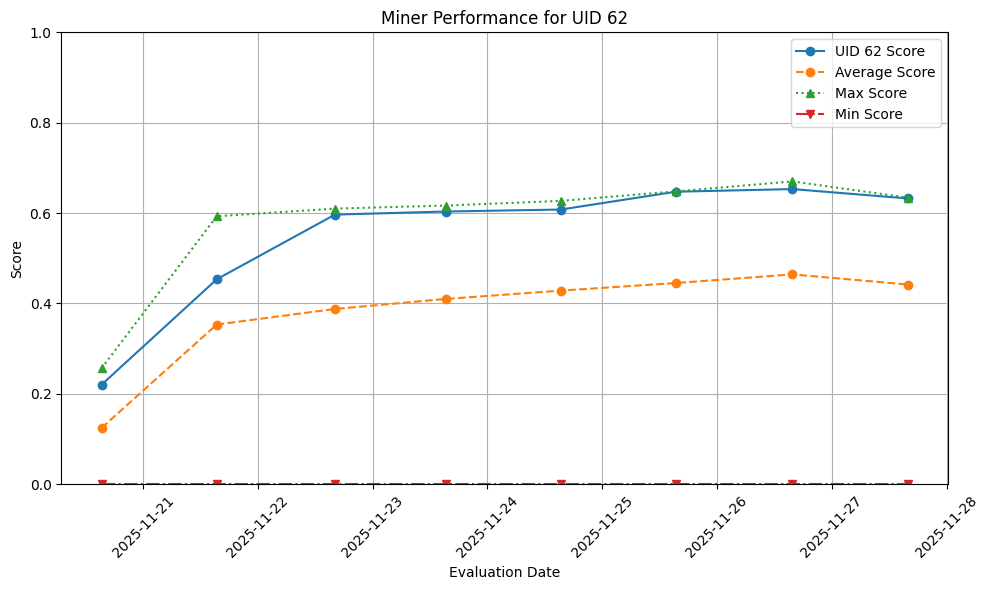

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


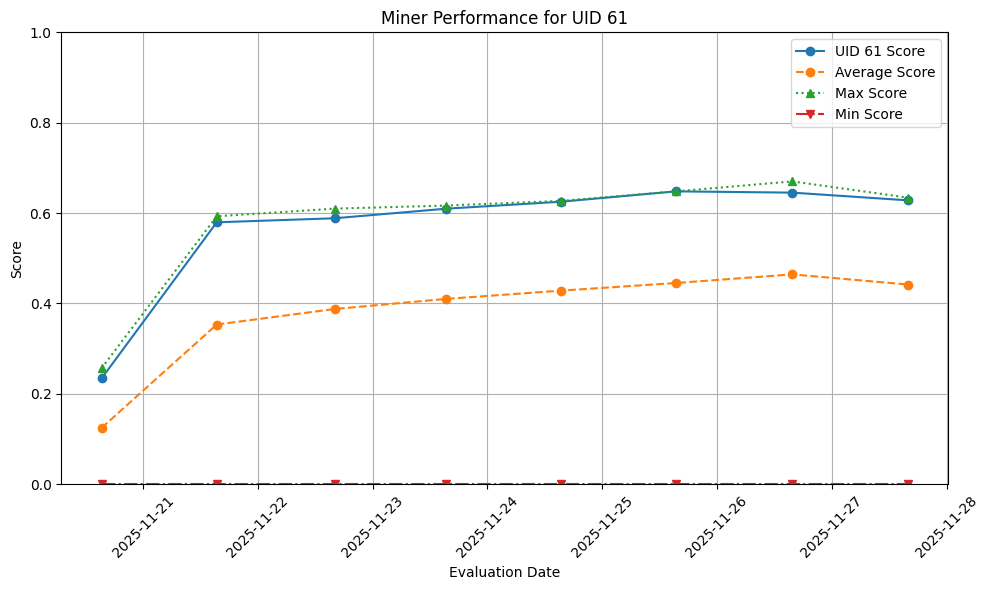

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


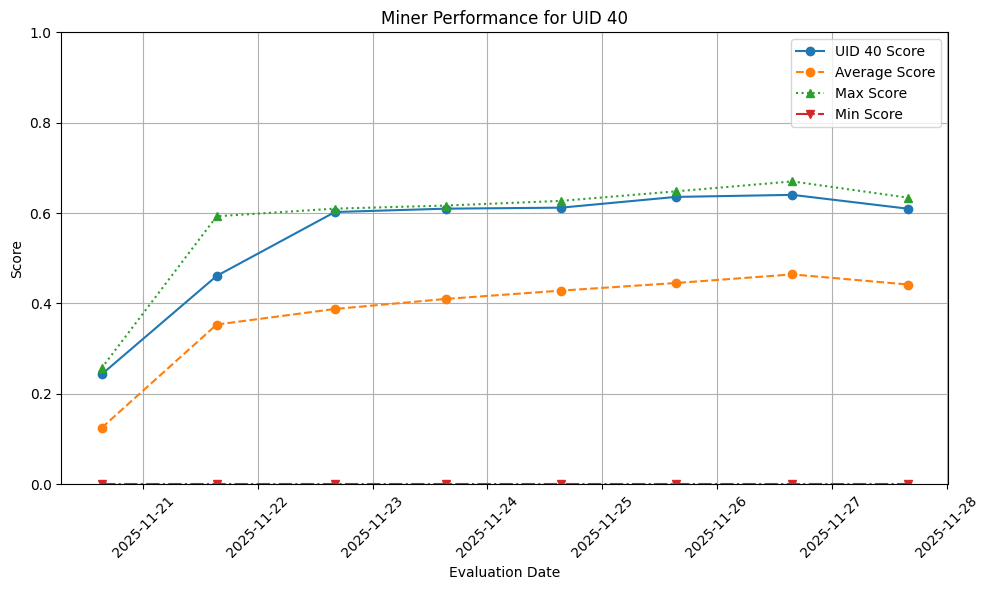

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


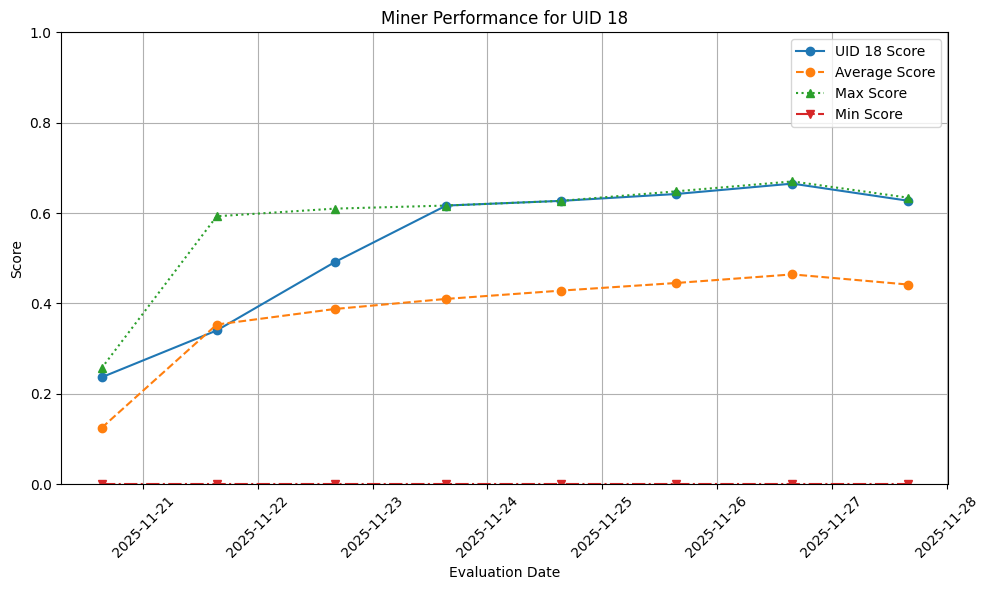

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


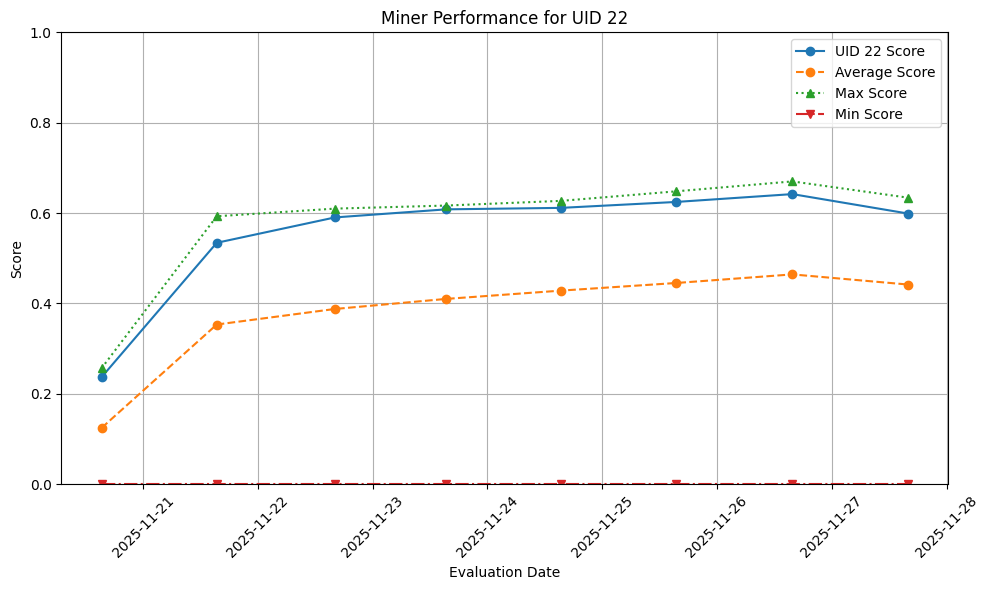

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


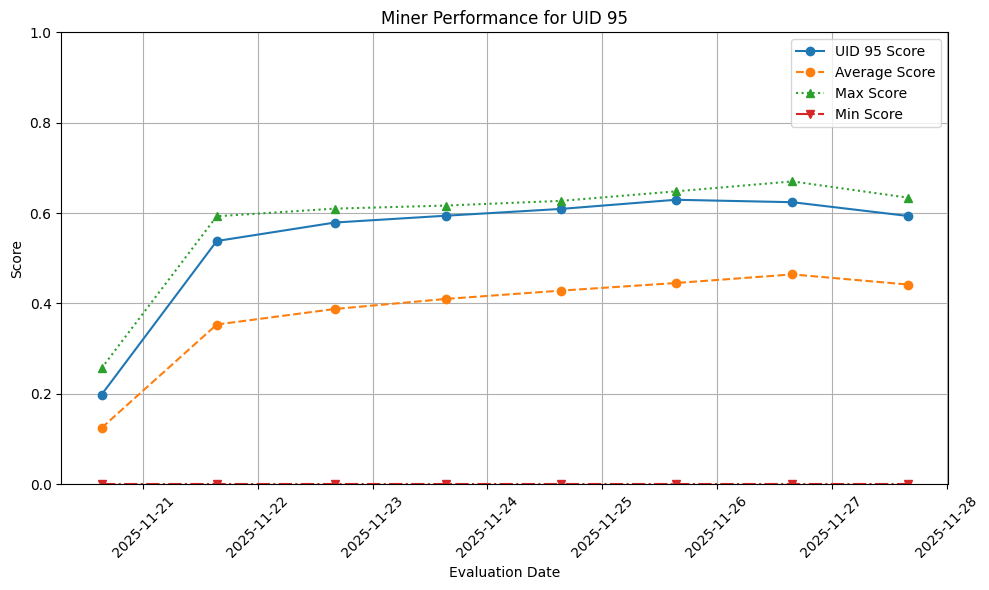

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


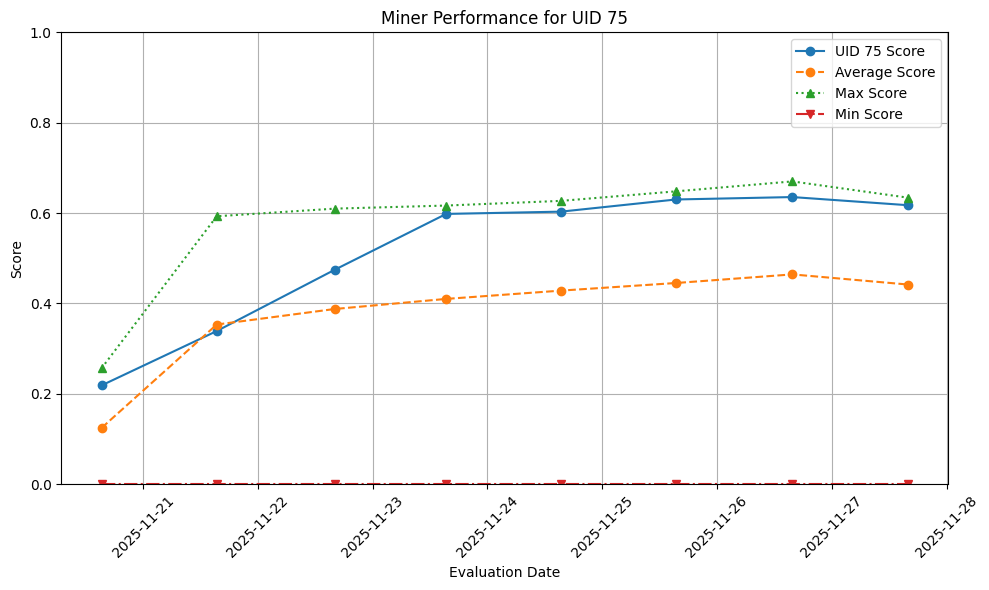

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


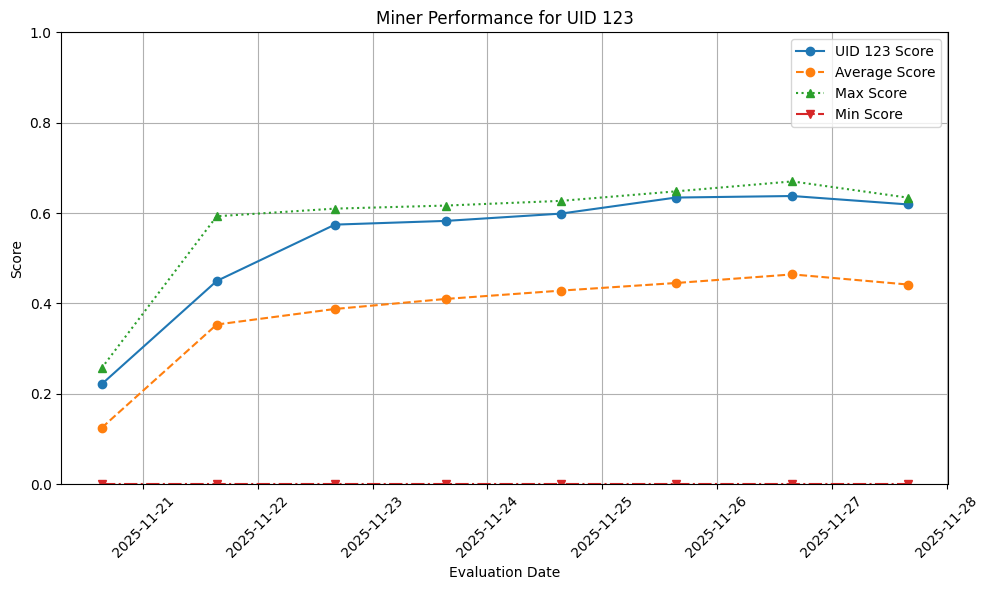

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


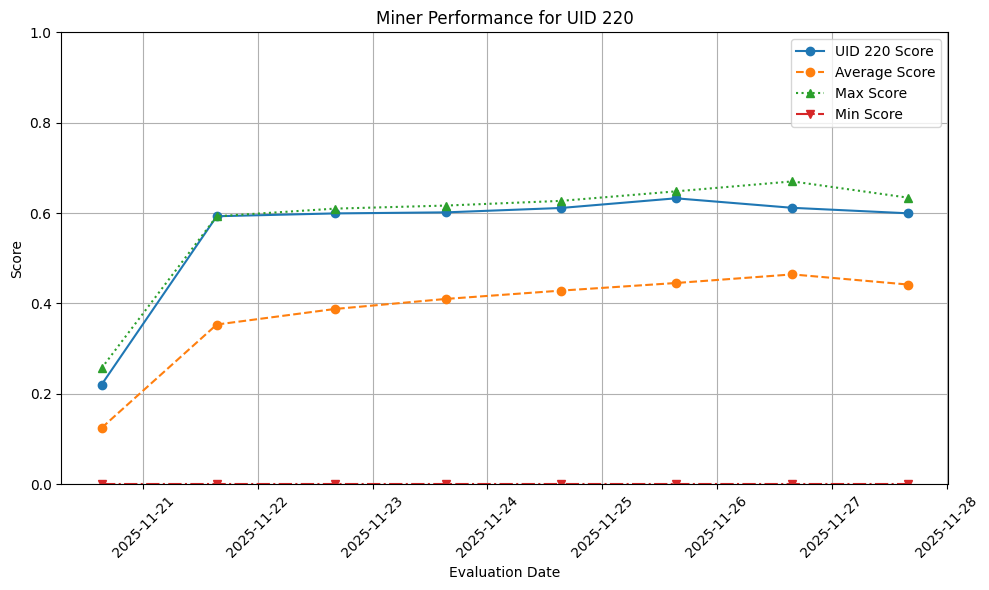

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


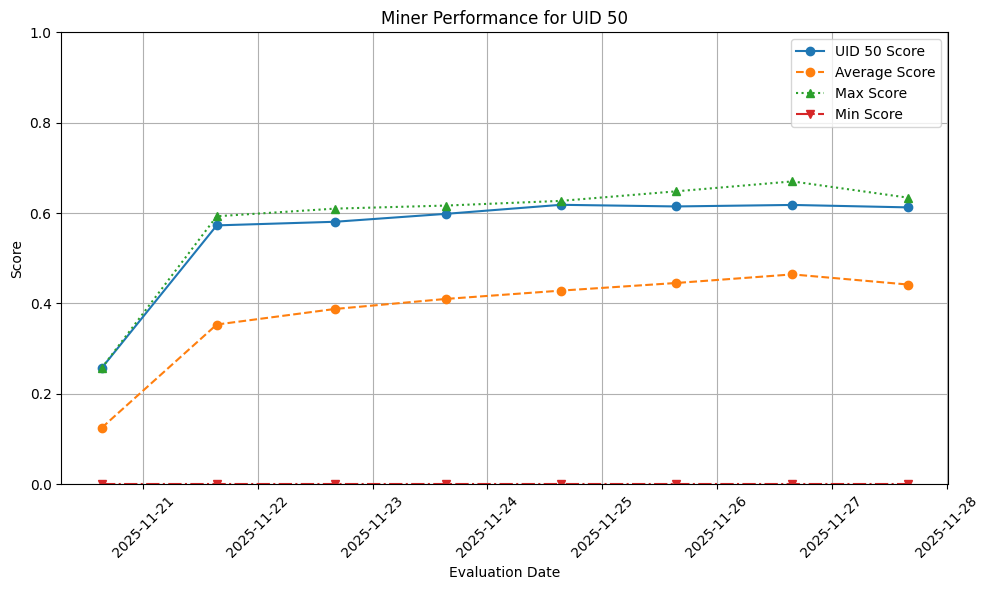

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


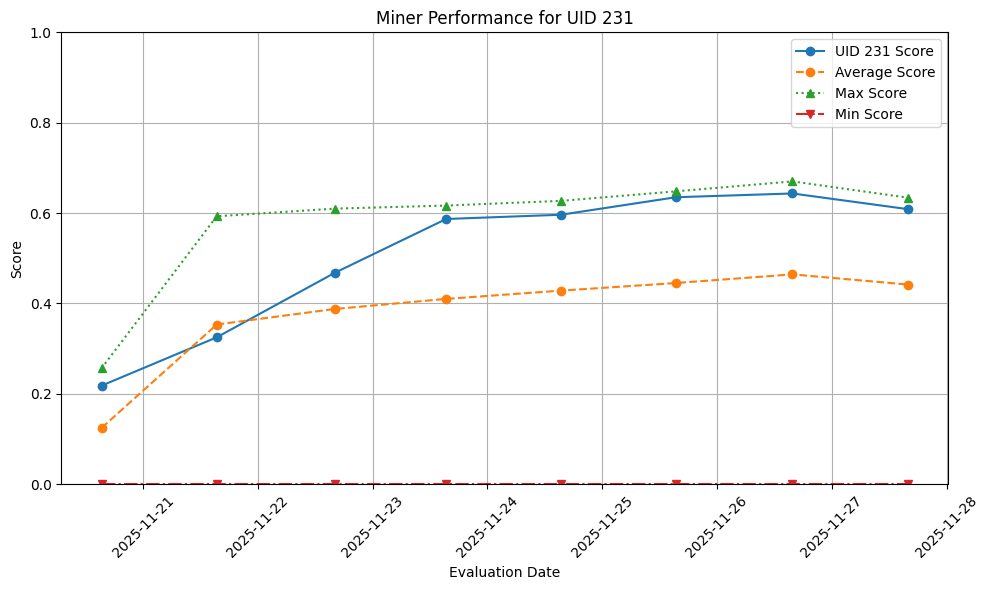

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


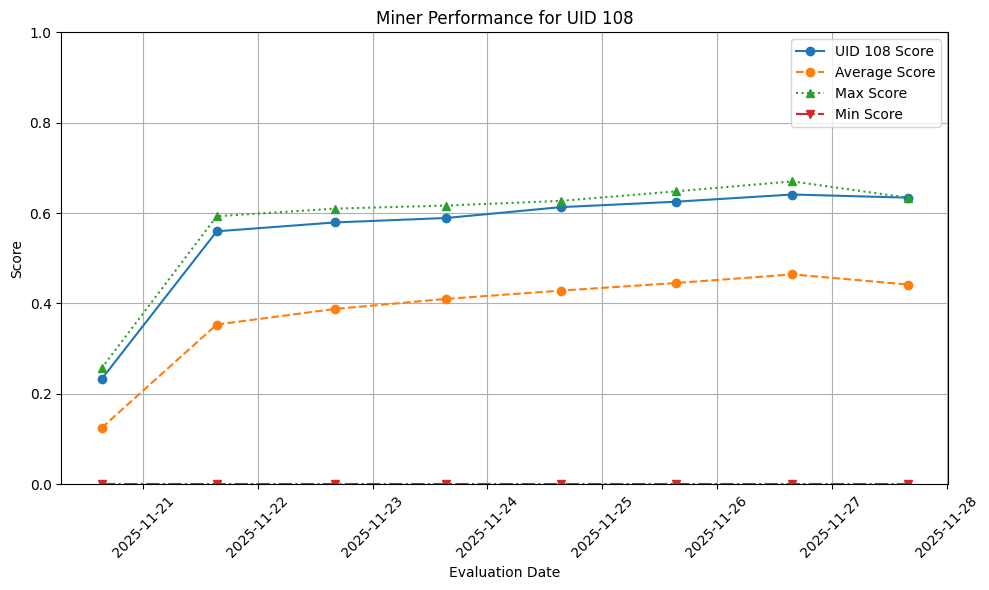

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


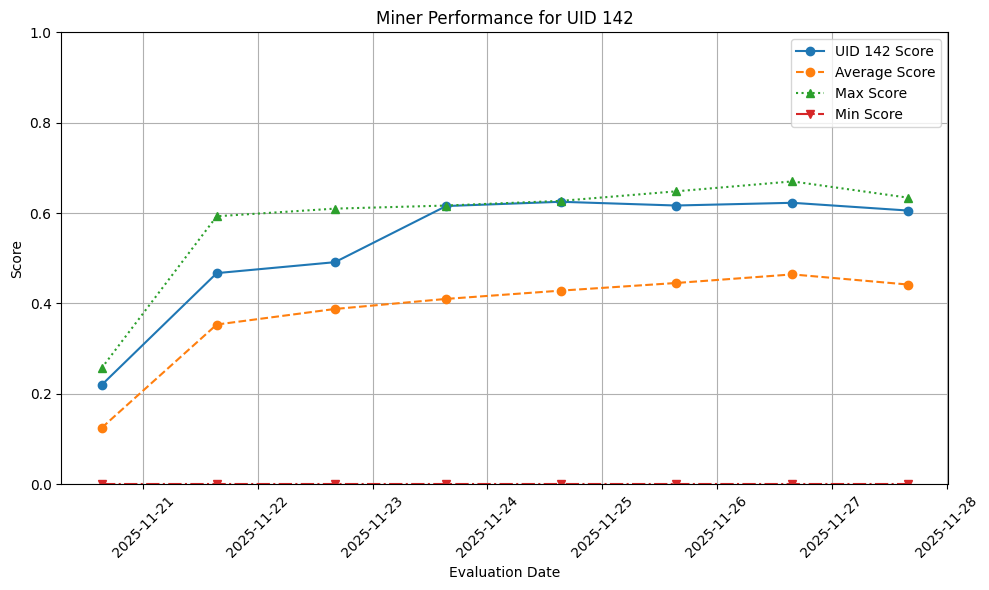

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


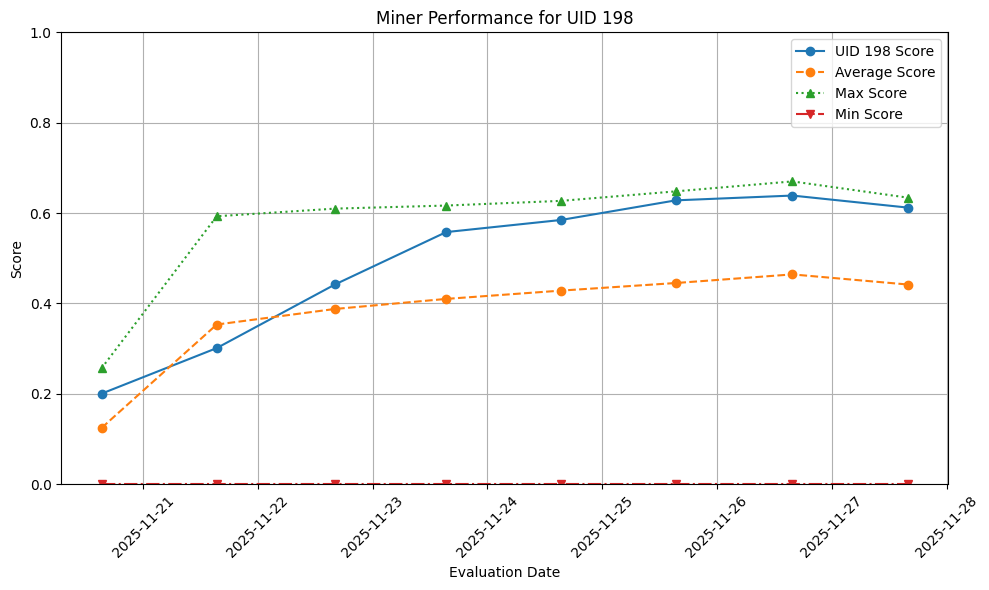

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


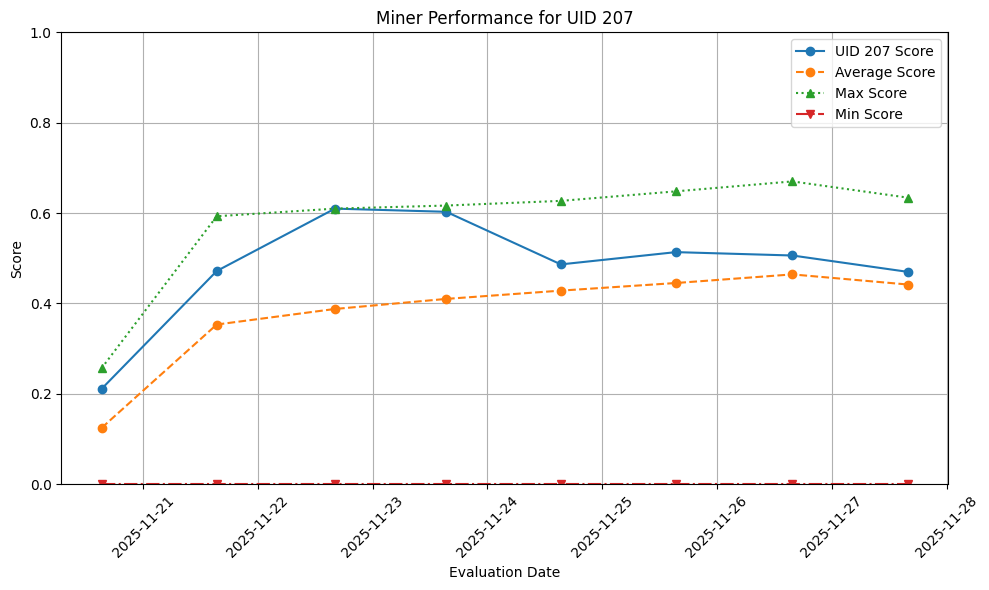

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


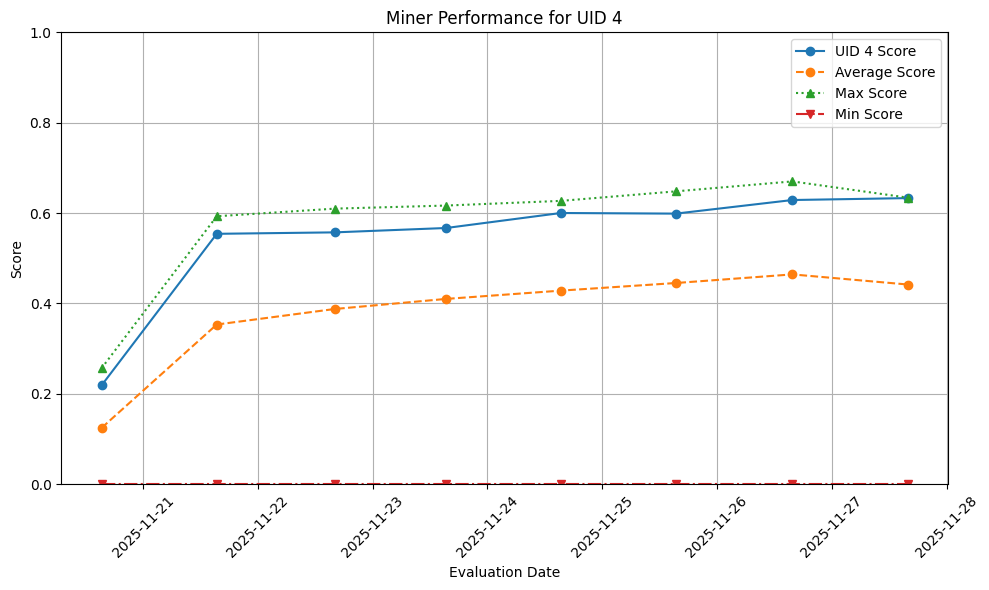

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


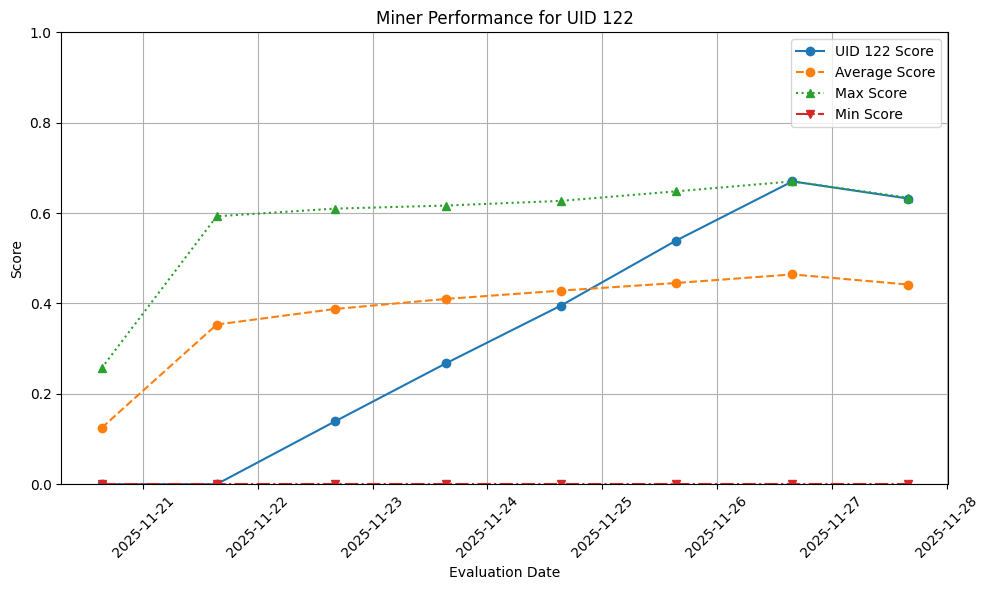

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


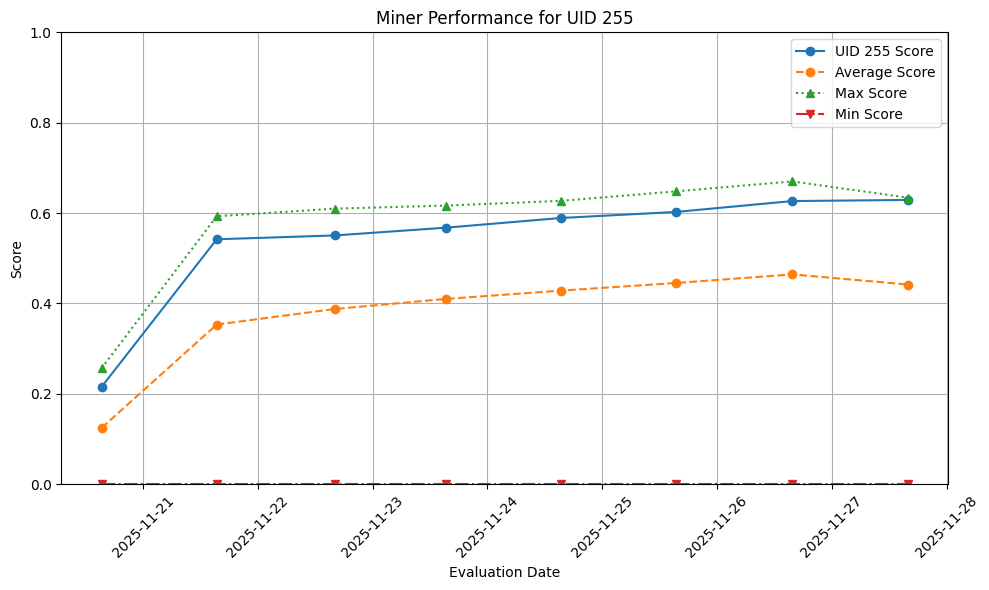

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


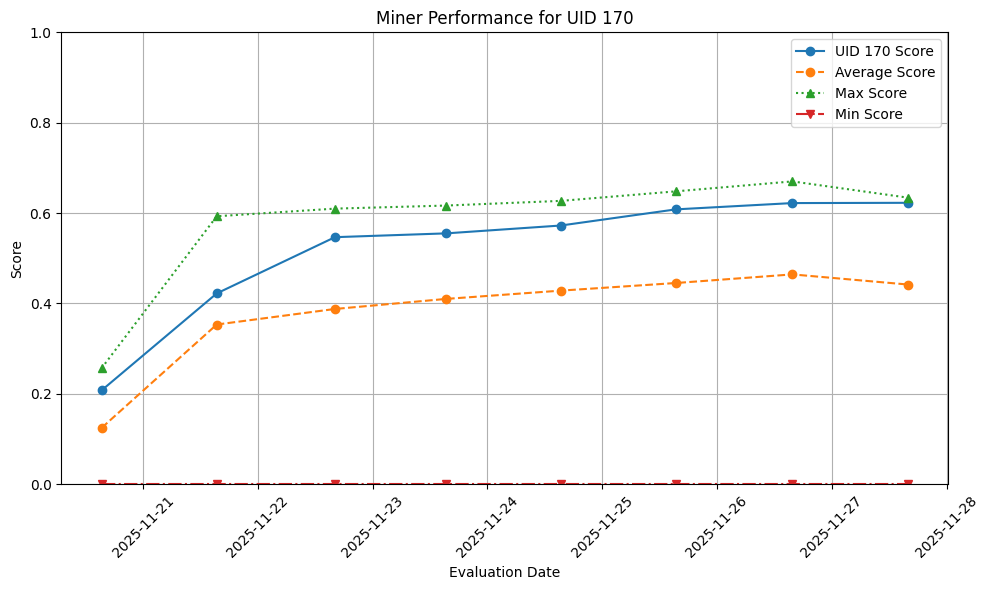

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


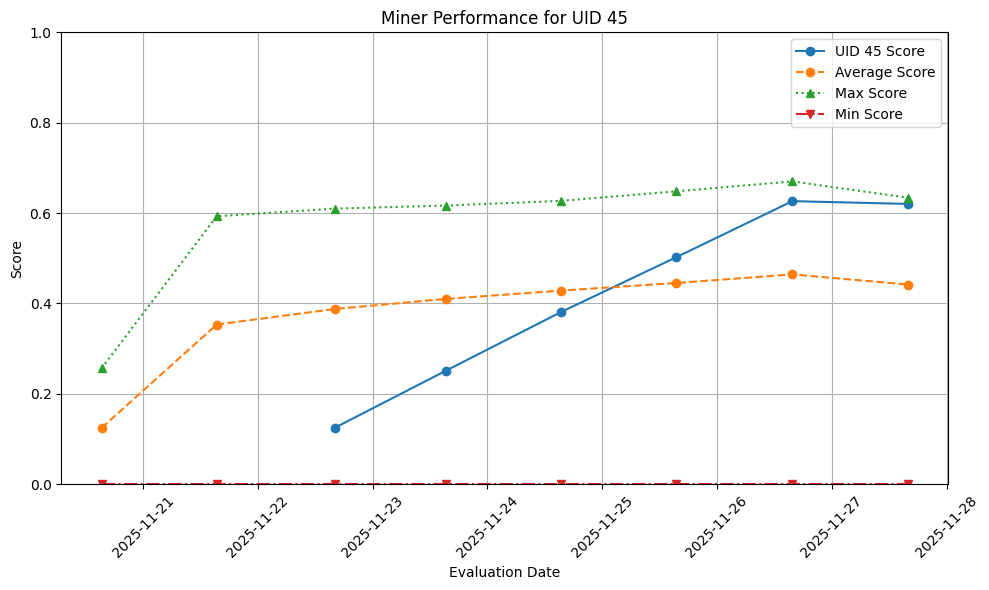

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


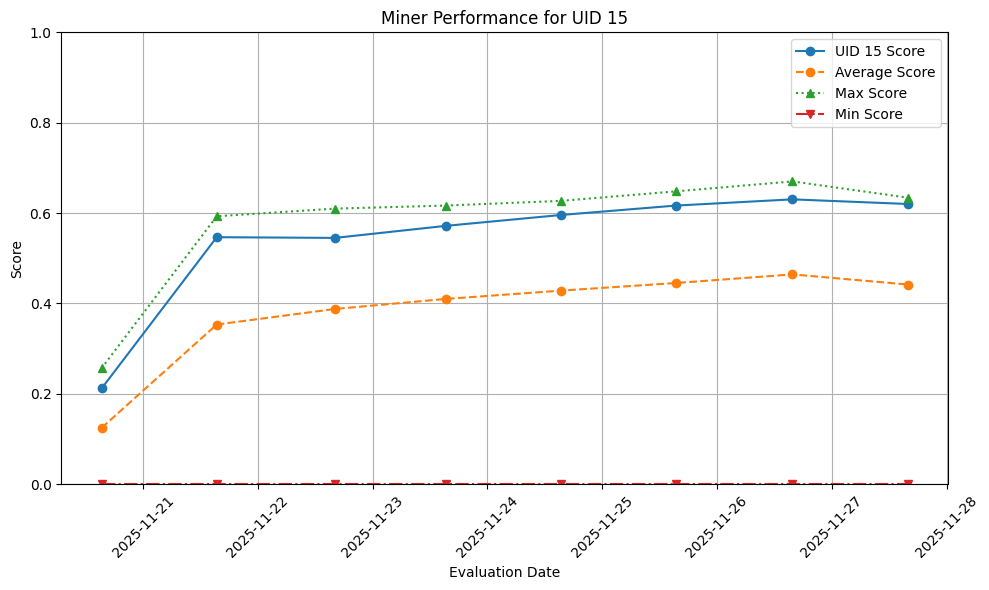

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


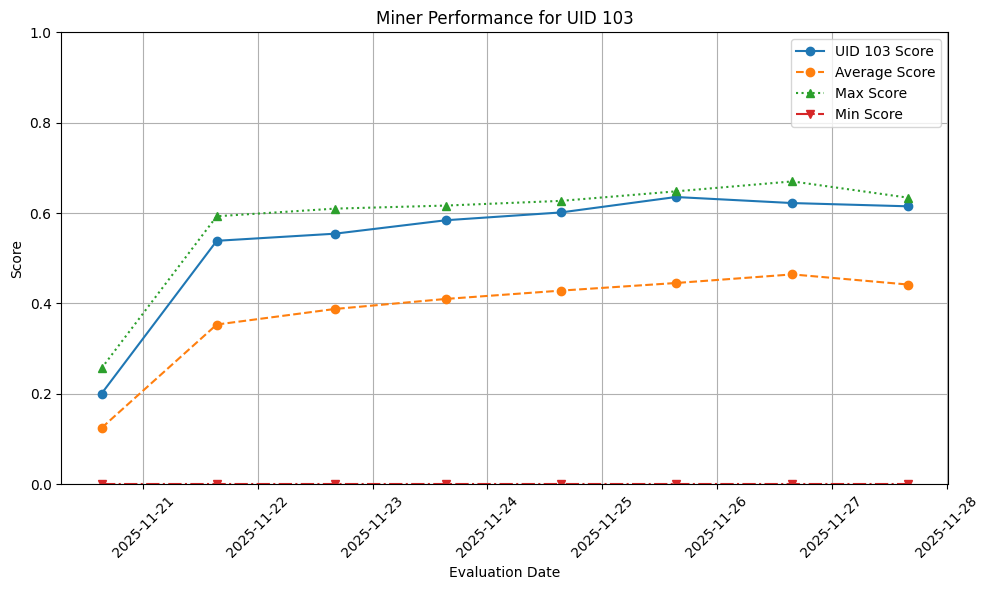

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


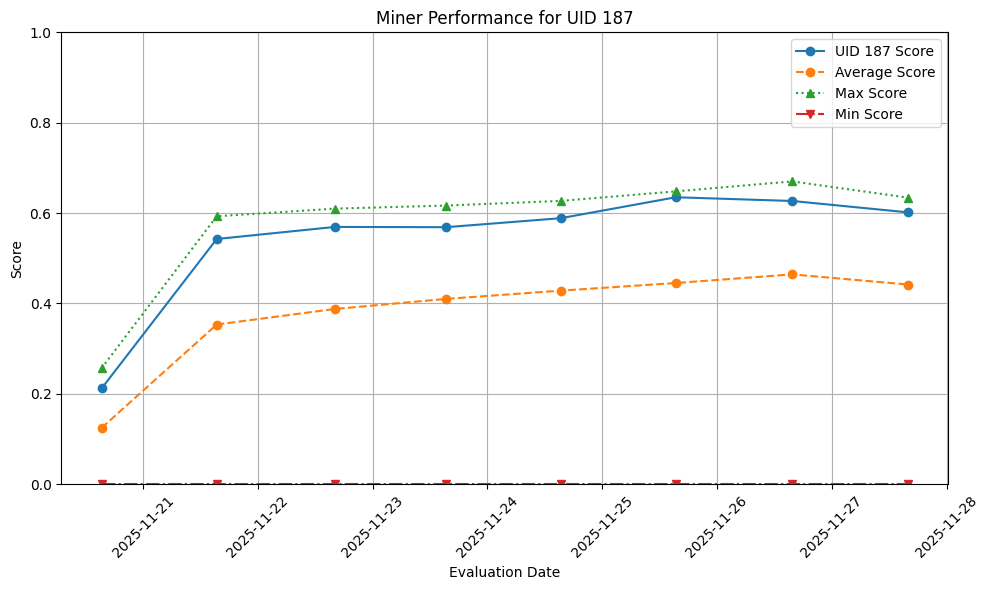

/tmp/ipykernel_944297/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


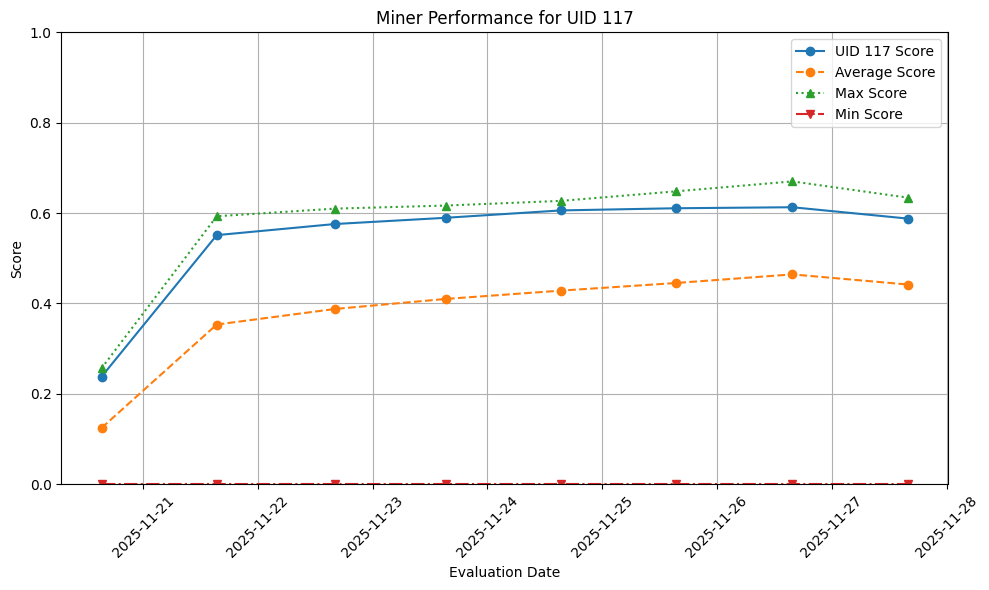

In [17]:
for id in frequent_miners:
    plot_miner_performance_with_uid(id)

In [11]:
for uid in frequent_miners:
    tmp = df[df['uid'] == uid].sort_values('evaluation_date', ascending=False)
    display(tmp)
    

,rank,evaluation_date,uid,score,average_score,model_url
2,2,2025-11-27 15:55:00,62,0.611830,0.632359,https://huggingface.co/speechmaster/76_94/blob...
2,2,2025-11-26 15:46:00,62,0.622000,0.653094,https://huggingface.co/speechmaster/76_94/blob...
1,1,2025-11-25 15:24:00,62,0.710520,0.647261,https://huggingface.co/speechmaster/76_94/blob...
9,9,2025-11-24 15:21:00,62,0.579896,0.607820,https://huggingface.co/speechmaster/76_94/blob...
5,5,2025-11-23 15:22:00,62,0.637548,0.603429,https://huggingface.co/speechmaster/76_94/blob...
3,3,2025-11-22 16:06:00,62,0.715506,0.596583,https://huggingface.co/speechmaster/76_94/blob...
69,69,2025-11-21 15:23:00,62,0.592835,0.453482,https://huggingface.co/speechmaster/76_94/blob...
38,38,2025-11-20 15:18:00,62,0.525649,0.220148,https://huggingface.co/speechmaster/76_94/blob...


,rank,evaluation_date,uid,score,average_score,model_url
6,6,2025-11-27 15:55:00,18,0.568414,0.627377,https://huggingface.co/speechmaster/76_118/blo...
1,1,2025-11-26 15:46:00,18,0.664216,0.665159,https://huggingface.co/speechmaster/76_118/blo...
2,2,2025-11-25 15:24:00,18,0.677769,0.642174,https://huggingface.co/speechmaster/76_118/blo...
0,0,2025-11-24 15:21:00,18,0.601714,0.626971,https://huggingface.co/speechmaster/76_118/blo...
0,0,2025-11-23 15:22:00,18,0.624774,0.616637,https://huggingface.co/speechmaster/76_118/blo...
72,72,2025-11-22 16:06:00,18,0.757321,0.491683,https://huggingface.co/speechmaster/76_118/blo...
100,100,2025-11-21 15:23:00,18,0.549292,0.340218,https://huggingface.co/speechmaster/76_118/blo...
6,6,2025-11-20 15:18:00,18,0.609494,0.236522,https://huggingface.co/speechmaster/76_118/blo...


,rank,evaluation_date,uid,score,average_score,model_url
5,5,2025-11-27 15:55:00,61,0.540831,0.628195,https://huggingface.co/grose99111/nmodel08/blo...
3,3,2025-11-26 15:46:00,61,0.653360,0.645212,https://huggingface.co/grose99111/nmodel08/blo...
0,0,2025-11-25 15:24:00,61,0.704728,0.648060,https://huggingface.co/grose99111/nmodel08/blo...
1,1,2025-11-24 15:21:00,61,0.635232,0.625103,https://huggingface.co/grose99111/nmodel08/blo...
3,3,2025-11-23 15:22:00,61,0.606821,0.609690,https://huggingface.co/grose99111/nmodel08/blo...
5,5,2025-11-22 16:06:00,61,0.625917,0.588536,https://huggingface.co/grose99111/nmodel08/blo...
2,2,2025-11-21 15:23:00,61,0.667603,0.579567,https://huggingface.co/grose99111/nmodel08/blo...
12,12,2025-11-20 15:18:00,61,0.605503,0.234067,https://huggingface.co/grose99111/nmodel08/blo...


,rank,evaluation_date,uid,score,average_score,model_url
22,22,2025-11-27 15:55:00,231,0.541250,0.608682,https://huggingface.co/speechmaster/76_138/blo...
4,4,2025-11-26 15:46:00,231,0.625394,0.643369,https://huggingface.co/speechmaster/76_138/blo...
5,5,2025-11-25 15:24:00,231,0.711500,0.635029,https://huggingface.co/speechmaster/76_138/blo...
27,27,2025-11-24 15:21:00,231,0.570591,0.596274,https://huggingface.co/speechmaster/76_138/blo...
20,20,2025-11-23 15:22:00,231,0.594672,0.586900,https://huggingface.co/speechmaster/76_138/blo...
81,81,2025-11-22 16:06:00,231,0.714690,0.467966,https://huggingface.co/speechmaster/76_138/blo...
112,112,2025-11-21 15:23:00,231,0.583691,0.325028,https://huggingface.co/speechmaster/76_138/blo...
43,43,2025-11-20 15:18:00,231,0.530761,0.218058,https://huggingface.co/speechmaster/76_138/blo...
